In [8]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

import matplotlib as mpl
import numpy as np
from datetime import datetime
from datetime import timedelta
import xlwings as xw
import time
import warnings
import shutil



#更改文件名
path='3月现货数据日报表'
list_path=os.path.join(os.getcwd(),path)
new_path = '现货数据日报表'
file_list = os.listdir(list_path)
if len(file_list)!=0:
    for i in file_list:
        str = re.findall(r"\d+\.?\d*", i)
        if len(str) == 1:
            new_file = '2022-' + str[0][0:2] + '-' + str[0][3:5] + '现货数据日报表.xlsx'

        else:
            new_file = str[0][0:4] + '-03-' + str[1][0:4] + '现货数据日报表.xlsx'
            print(new_file)
        old_file = os.path.join(list_path,i)
        new_file = os.path.join(list_path, new_file)
        os.rename(old_file, new_file)
        shutil.copy(new_file,new_path)
        os.remove(new_file)

warnings.filterwarnings("ignore") #取消警告
# mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.style.use('seaborn') # 用来设置作图风格
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 设置综合厂用电率
zhcyd=0.8867
#汇总现货日报表数据
path='现货数据日报表'
list_path=os.path.join(path)
file_list=os.listdir(list_path)
dfs=[]
#app=xw.App(visible=False,add_book=False)

if len(file_list)!=0:
    for i in file_list:
        file=os.path.join(list_path,i)
        #workbook=app.books.open(file)
        #worksheet=workbook.sheets('1.公司现货综合信息')
        #zhcyd=worksheet.range('B12').value  #综合厂用电
        #workbook.close()
        df1 = pd.read_excel(file, '3.日前出清发电量数据',parse_dates=['日期','时间'])
        df1['综合厂用电']=zhcyd
        dfs.append(df1)
        df=pd.concat(dfs)
df.dropna(subset=['时间'],inplace=True)  #对无效数据进行清洗
#app.quit()



#将日期转为字符型
df['日期']=df['日期'].apply(lambda x:x.strftime('%Y-%m-%d'))

#将24替换成23:59
#df.to_excel('2.xlsx',index=False)
df['时间'].replace('1900-01-01 00:00:00','23:59',inplace=True)
df['时间'].replace('24:00','23:59',inplace=True)
df['时间']=df['时间'].astype('string')
df['时间']=df['时间'].apply(lambda x:x[:5])

#调整时间字段
df['时间']=df['时间'].apply(lambda x:' '+x)
#df['时间']=df['时间'].apply(lambda x:' '+x)
df['datetime']=df['日期']+df['时间']
df.to_excel('1.xlsx')
df['datetime']=df['datetime'].astype('datetime64[ns]')

#将中长期均价为空的数据进行填充
df['中长期均价'].fillna(method='ffill',inplace=True)
#增加Cost字段（中长期均价与出清价差）
df['cost']=df['中长期均价']-df['出清价格']
# 如果中长期价格为空时，用中长期均价替换中长期价格
m = df['中长期价格'].notna()
df.loc[:,'中长期价格']=df.loc[:,'中长期价格'].where(m,df.loc[:,'中长期均价'])
# 增加日前与中长期电量差（发电量口径）
df['日前与中长期电量差']=df['中标出力']-df['中长期电量']
#增加中长期电费
df['中长期电费']=df['中长期电量']*df['中长期价格']*df['综合厂用电']/4
#增加日前电费收入
df['日前电费收入']=df['日前与中长期电量差']*df['出清价格']*df['综合厂用电']/4
#增加实时电量与日前电量差
df['实时电量与日前电量差']=df['实际出力']-df['中标出力']
#增加实时电费收入
df['实时电费收入']=df['实时电量与日前电量差']*df['日内节点电价']*df['综合厂用电']/4
#增加电能量收入
df['电能量收入']=df['中长期电费']+df['日前电费收入']+df['实时电费收入']
#增加电费变动成本
df['电费变动成本']=df['变动成本']*df['实际出力']*df['综合厂用电']/4
#增加电能量盈亏
df['电能量盈亏']=df['电能量收入']-df['电费变动成本']
#增加综合厂用电率
df['综合厂用电率']=df['综合厂用电']
df.drop(df.iloc[:,10:24],axis=1,inplace=True)
#将时间类型统一为字符
# df['时间']=df['时间'].astype('string')
# df['时间']=df['时间'].apply(lambda x:x[:6])

#将datetime类型统一为字符型，然后转换为日期型
#df['datetime']=df['datetime'].astype('datetime64[ns]')
#df['datetime']=df['datetime'].apply(lambda x:datetime.strptime(x,'%c'))

df.to_excel('现货日前数据.xlsx',index=False)
print('已完成导入数据')

2022-03-03现货数据日报表.xlsx
已完成导入数据


In [5]:
new_path = r'.\现货数据日报表'


'/Users/a123/Documents/OneDrive - A/7_2021/01_电力营销/09_现货交易/4-6月现货/3月现货数据日报表'

In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np
from datetime import datetime
from datetime import timedelta
import xlwings as xw
import time
import warnings
import shutil



#更改文件名
path = r'\3月现货数据日报表'
list_path = os.getcwd() + path
new_path = r'.\现货数据日报表'
file_list = os.listdir(list_path)
if len(file_list)!=0:
    for i in file_list:
        str = re.findall(r"\d+\.?\d*", i)
        if len(str) == 1:
            new_file = '2022-' + str[0][0:2] + '-' + str[0][3:5] + '现货数据日报表.xlsx'

        else:
            new_file = str[0][0:4] + '-03-' + str[1][0:4] + '现货数据日报表.xlsx'
            print(new_file)
        old_file = list_path + '\\' + i
        new_file = list_path + '\\' + new_file
        os.rename(old_file, new_file)
        shutil.copy(new_file,new_path)
        os.remove(new_file)

warnings.filterwarnings("ignore") #取消警告
# mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.style.use('seaborn') # 用来设置作图风格
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号
# 设置综合厂用电率
zhcyd=0.8867
#汇总现货日报表数据
path=r'\现货数据日报表'
list_path=os.getcwd()+path
file_list=os.listdir(list_path)
dfs=[]
#app=xw.App(visible=False,add_book=False)

if len(file_list)!=0:
    for i in file_list:
        file=list_path+'\\'+i
        #workbook=app.books.open(file)
        #worksheet=workbook.sheets('1.公司现货综合信息')
        #zhcyd=worksheet.range('B12').value  #综合厂用电
        #workbook.close()
        df1 = pd.read_excel(file, '3.日前出清发电量数据',parse_dates=['日期','时间'])
        df1['综合厂用电']=zhcyd
        dfs.append(df1)
        df=pd.concat(dfs)
df.dropna(subset=['时间'],inplace=True)  #对无效数据进行清洗
#app.quit()



#将日期转为字符型
df['日期']=df['日期'].apply(lambda x:x.strftime('%Y-%m-%d'))

#将24替换成23:59
#df.to_excel('2.xlsx',index=False)
df['时间'].replace('1900-01-01 00:00:00','23:59',inplace=True)
df['时间'].replace('24:00','23:59',inplace=True)
df['时间']=df['时间'].astype('string')
df['时间']=df['时间'].apply(lambda x:x[:5])

#调整时间字段
df['时间']=df['时间'].apply(lambda x:' '+x)
#df['时间']=df['时间'].apply(lambda x:' '+x)
df['datetime']=df['日期']+df['时间']
df.to_excel('1.xlsx')
df['datetime']=df['datetime'].astype('datetime64[ns]')

#将中长期均价为空的数据进行填充
df['中长期均价'].fillna(method='ffill',inplace=True)
#增加Cost字段（中长期均价与出清价差）
df['cost']=df['中长期均价']-df['出清价格']
# 如果中长期价格为空时，用中长期均价替换中长期价格
m = df['中长期价格'].notna()
df.loc[:,'中长期价格']=df.loc[:,'中长期价格'].where(m,df.loc[:,'中长期均价'])
# 增加日前与中长期电量差（发电量口径）
df['日前与中长期电量差']=df['中标出力']-df['中长期电量']
#增加中长期电费
df['中长期电费']=df['中长期电量']*df['中长期价格']*df['综合厂用电']/4
#增加日前电费收入
df['日前电费收入']=df['日前与中长期电量差']*df['出清价格']*df['综合厂用电']/4
#增加实时电量与日前电量差
df['实时电量与日前电量差']=df['实际出力']-df['中标出力']
#增加实时电费收入
df['实时电费收入']=df['实时电量与日前电量差']*df['日内节点电价']*df['综合厂用电']/4
#增加电能量收入
df['电能量收入']=df['中长期电费']+df['日前电费收入']+df['实时电费收入']
#增加电费变动成本
df['电费变动成本']=df['变动成本']*df['实际出力']*df['综合厂用电']/4
#增加电能量盈亏
df['电能量盈亏']=df['电能量收入']-df['电费变动成本']
#增加综合厂用电率
df['综合厂用电率']=df['综合厂用电']
df.drop(df.iloc[:,10:24],axis=1,inplace=True)
#将时间类型统一为字符
# df['时间']=df['时间'].astype('string')
# df['时间']=df['时间'].apply(lambda x:x[:6])

#将datetime类型统一为字符型，然后转换为日期型
#df['datetime']=df['datetime'].astype('datetime64[ns]')
#df['datetime']=df['datetime'].apply(lambda x:datetime.strptime(x,'%c'))

df.to_excel('现货日前数据.xlsx',index=False)
print('已完成导入数据')

In [ ]:
df1=df.loc[df['日期']>'2022-02-01']  #选择近10天数据

df2=df1.loc[df1['时间'].isin (['04','04:15','04:30','04:45'])] #选择4：00

df2['中长期均价']=272.44 #选择上限价格
df2['收益1']=df2['中长期电量']*df2['中长期均价']+(df2['中标出力']-df2['中长期电量'])*df2['出清价格']  #有中长期收益
df2['收益2']=df2['中标出力']*df2['出清价格']
cost1=df2['收益2'].sum()-df2['收益1'].sum()
print('10天内4时无中长期比有中长期收益高%.2f元'%cost1)
print('===========================================')
df2=df1.loc[df1['时间'].isin (['05:00','05:15','05:30','05:45'])] #选择5：00
df2['中长期均价']=273.69 #选择上限价格
df2['收益1']=df2['中长期电量']*df2['中长期均价']+(df2['中标出力']-df2['中长期电量'])*df2['出清价格']  #有中长期收益
df2['收益2']=df2['中标出力']*df2['出清价格']
cost2=df2['收益2'].sum()-df2['收益1'].sum()
print('10天内5时无中长期比有中长期收益高%.2f元'%cost2)
print('===========================================')
df2=df1.loc[df1['时间'].isin (['11:00','11:15','11:30','11:45'])] #选择11：00
df2['中长期均价']=288.91#选择上限价格
df2['收益1']=df2['中长期电量']*df2['中长期均价']+(df2['中标出力']-df2['中长期电量'])*df2['出清价格']  #有中长期收益
df2['收益2']=df2['中标出力']*df2['出清价格']
cost3=df2['收益2'].sum()-df2['收益1'].sum()
print('10天内11时无中长期比有中长期收益高%.2f元'%cost3)
print('===========================================')
df2=df1.loc[df1['时间'].isin (['12:00','12:15','12:30','12:45'])] #选择12：00
df2['中长期均价']=223.66 #选择上限价格
df2['收益1']=df2['中长期电量']*df2['中长期均价']+(df2['中标出力']-df2['中长期电量'])*df2['出清价格']  #有中长期收益
df2['收益2']=df2['中标出力']*df2['出清价格']
cost1=df2['收益2'].sum()-df2['收益1'].sum()
print('10天内12时无中长期比有中长期收益高{0:,.2f}元'.format(cost1))
print('===========================================')
df2=df1.loc[df1['时间'].isin (['13:00','13:15','13:30','13:45'])] #选择13：00
df2['中长期均价']=160.99 #选择上限价格
df2['收益1']=df2['中长期电量']*df2['中长期均价']+(df2['中标出力']-df2['中长期电量'])*df2['出清价格']  #有中长期收益
df2['收益2']=df2['中标出力']*df2['出清价格']
cost1=df2['收益2'].sum()-df2['收益1'].sum()
print('10天内13时无中长期比有中长期收益高{0:,.2f}元'.format(cost1))
print('===========================================')

In [ ]:
#日前出清平均价格

def cqjg(day):
    ls=(datetime.now()-timedelta(day)).strftime('%Y-%m-%d') #几日内（以当前日期为基准）
    ts=df.loc[df['日期']>=ls,['时间','出清价格']].groupby(['时间']).mean()
    return ts
def cqjg_huitu(day,m):
    xtime=df.groupby(['时间']).mean()    
    x=range(0,len(xtime),4)
    plt.xticks(x,["0",'1',"2","3","4","5",'6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
    plt.text(len(xtime.index)+5,400-5,r'%d日内平均出清价格为： %.2f元/MWH'% (day,cqjg(day).mean().values[0]),fontsize=10)
    plt.text(len(xtime.index)+5,400-55,r'%d日内最高出清价格为： %.2f元/MWH'% (day,cqjg(day).max()),fontsize=10)
    plt.text(len(xtime.index)+5,400-105,r'%d日内最低出清价格为： %.2f元/MWH'% (day,cqjg(day).min().values[0]),fontsize=10)
    plt.text(len(xtime.index)+5,400-155,r'%d日内中位出清价格为： %.2f元/MWH'% (day,cqjg(day).median().values[0]),fontsize=10)
    plt.plot(cqjg(day),'-', label=r'%d日内出清价格'%day,color=m)
    plt.ylabel('价格')
    plt.xlabel('小时')
    plt.legend(loc='upper left')

plt.figure(figsize=(10,30),dpi=300)    

   
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'c'}
days={0:5,
      1:7,
      2:10,
     3:15,
     4:20,
     5:30,
     6:40,
     7:60}
for i in range(len(colors)):
    plt.subplot(8,1,i+1)
    cqjg_huitu(days[i],colors[i])
 

In [ ]:
#每小时平均出清价格
df_hour=df.reset_index()
df_hour['小时']=df_hour['datetime'].apply(lambda x:x.hour)
#按小时计算出清平均价格
def cqjg_hour(day):
    ls=(datetime.now()-timedelta(day)).strftime('%Y-%m-%d') #几日内（以当前日期为基准）
    ts=df_hour.loc[df_hour['日期']>=ls,['日期','小时','出清价格','中标出力','中长期电量','中长期价格']].groupby(['小时']).mean()
    ts=ts.apply(lambda x:round(x,2))
    return ts

days=[5,7,10,15,20,30,40,60]

ms=pd.DataFrame({'小时':range(24),
                 '5日内':cqjg_hour(5)['出清价格'].values,
                 '7日内':cqjg_hour(7)['出清价格'].values,
                 '10日内':cqjg_hour(10)['出清价格'].values,
                '15日内':cqjg_hour(15)['出清价格'].values,
                 '20日内':cqjg_hour(20)['出清价格'].values,
                 '25日内':cqjg_hour(25)['出清价格'].values,
                 '30日内':cqjg_hour(30)['出清价格'].values,
                 '40日内':cqjg_hour(40)['出清价格'].values,
                 '50日内':cqjg_hour(50)['出清价格'].values,
                 '60日内':cqjg_hour(60)['出清价格'].values})
ms['小时']=ms['小时'].apply(lambda x:x+1)


#导入分时段价格上下限文件
file_xr=r'.\每月分时上下限\2022年2月上下限.xlsx'
fs=pd.read_excel(file_xr,skipfooter=3)
fs=fs.rename(columns={'小时序号':'小时','指导价（元/兆瓦时）':'指导价','下限价（元/兆瓦时）':'下限价','上限价（元/兆瓦时）':'上限价'})
fs_hour=pd.merge(ms,fs,on='小时',how='left')
fs_hour.to_excel('每小时平均出清价格.xlsx',index=False)
fs_hour
plt.figure(figsize=(15,5),dpi=300)
x=fs_hour['小时']
# xtime=df.groupby(['时间']).mean()    
# x=range(0,len(xtime),4)
plt.xticks(x,["0",'1',"2","3","4","5",'6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.plot(fs_hour['下限价'],'--',color='r',label='下限价')
plt.plot(fs_hour['上限价'],'--',color='y',label='上限价')
plt.plot(fs_hour['5日内'],'.-',color='b',label='5日内')
#plt.plot(fs_hour['7日内'],'.-',color='b',label='7日内')
#plt.plot(fs_hour['10日内'],'.-',color='m',label='10日内')
plt.plot(fs_hour['15日内'],'.-',color='c',label='15日内')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#实时平均价格
def shi_cqjg(day):
    ls=(datetime.now()-timedelta(day)).strftime('%Y-%m-%d') #几日内（以当前日期为基准）
    ts=df.loc[df['日期']>=ls,['时间','日内节点电价']].groupby(['时间']).mean()
    return ts
def shi_huitu(day,m):
    xtime=df.groupby(['时间']).mean()    
    x=range(0,len(xtime),4)
    plt.xticks(x,["0",'1',"2","3","4","5",'6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
    plt.text(len(xtime.index)+5,shi_cqjg(day).max().values[0],r'%d日内平均节点电价为： %.2f元/MWH'% (day,shi_cqjg(day).mean().values[0]),fontsize=10)
    plt.text(len(xtime.index)+5,shi_cqjg(day).max().values[0]*0.9,r'%d日内最高节点电价为： %.2f元/MWH'% (day,shi_cqjg(day).max().values[0]),fontsize=10)
    plt.text(len(xtime.index)+5,shi_cqjg(day).max().values[0]*0.8,r'%d日内最低节点电价为： %.2f元/MWH'% (day,shi_cqjg(day).min().values[0]),fontsize=10)
    plt.text(len(xtime.index)+5,shi_cqjg(day).max().values[0]*0.7,r'%d日内中位节点电价为： %.2f元/MWH'% (day,shi_cqjg(day).median().values[0]),fontsize=10)
    plt.plot(shi_cqjg(day),'-', label=r'%d日内节点电价'%day,color=m)
    plt.ylabel('价格')
    plt.legend(loc='upper left')

plt.figure(figsize=(10,30),dpi=300)    
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'c'}
days={0:1,
      1:5,
      2:7,
     3:10,
     4:15,
     5:20,
     6:30,
     7:40}
for i in range(len(colors)):
    plt.subplot(8,1,i+1)
    shi_huitu(days[i],colors[i])


In [ ]:
#日前出清价格和实时价格

plt.figure(figsize=(10,30),dpi=300)    
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'c'}
days={0:1,
      1:2,
      2:3,
     3:4,
     4:5,
     5:6,
     6:7,
     7:10}
for i in range(len(colors)):
    plt.subplot(8,1,i+1)
    cqjg_huitu(days[i],colors[len(colors)-i-1])
    shi_huitu(days[i],colors[i])
    


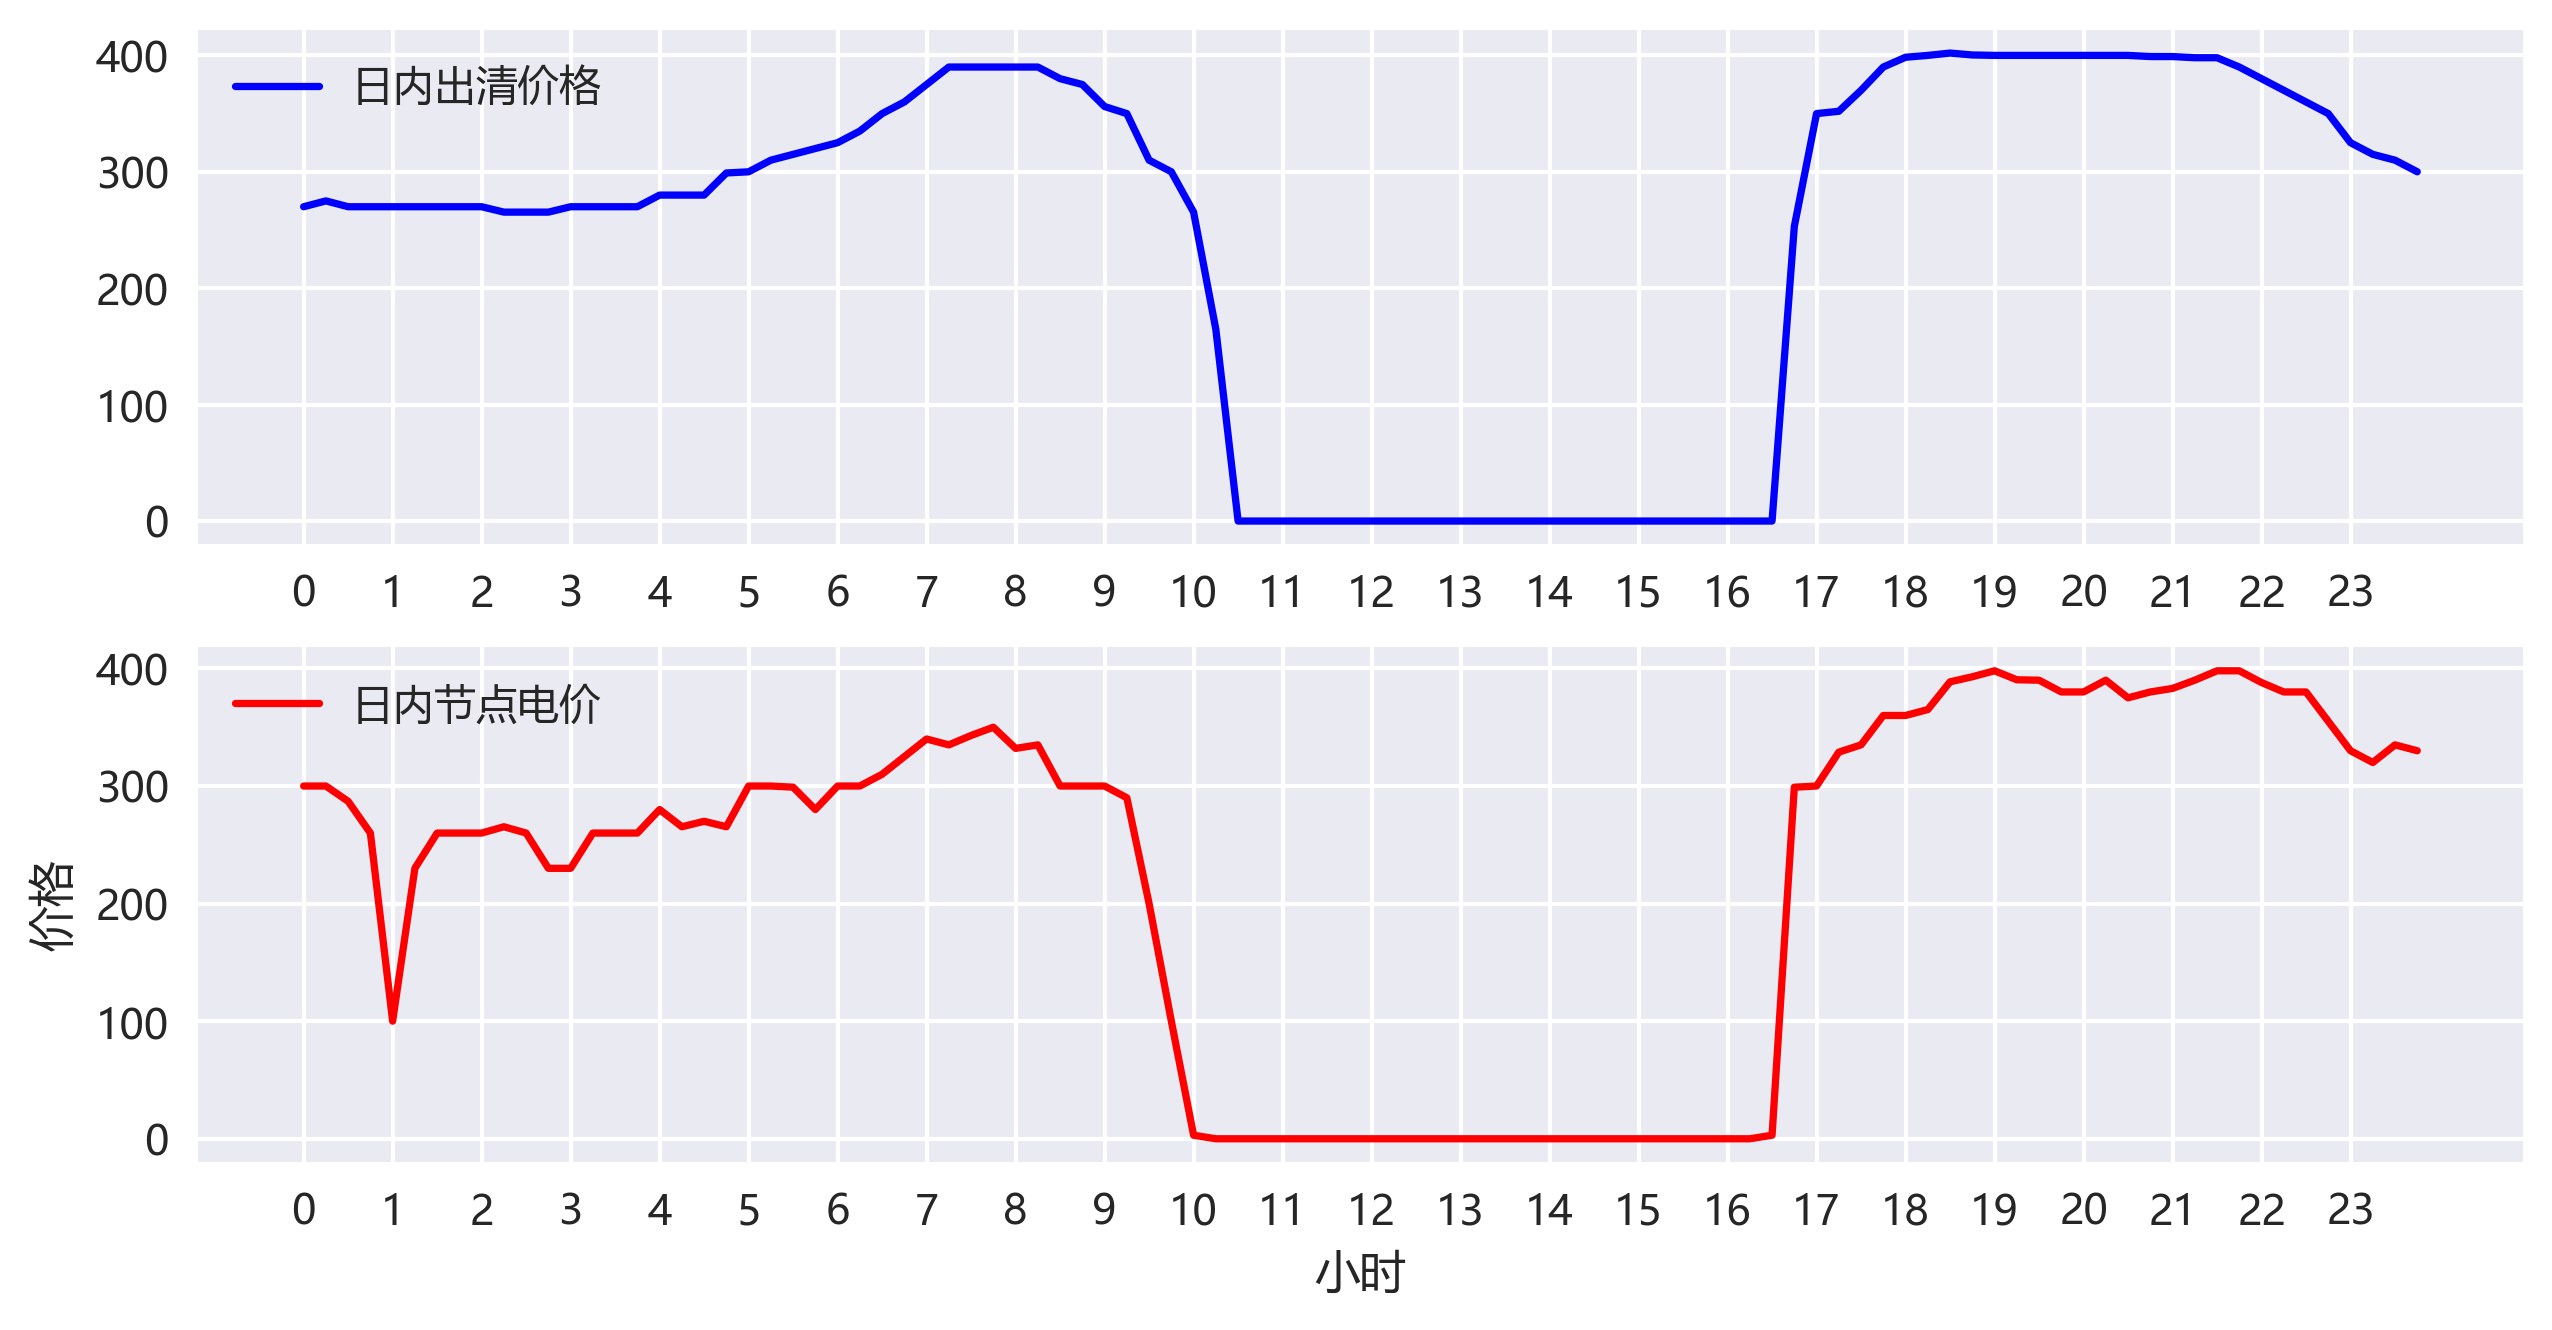

In [36]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import numpy as np
from datetime import datetime
from datetime import timedelta
import time
import warnings
import shutil

#日前出清价格和实时价格
def cqjg(day):
    #ls=(datetime.now()-timedelta(day)).strftime('%Y-%m-%d') #几日内（以当前日期为基准）
    ts=df.loc[df['日期']==day,['时间','出清价格']].groupby(['时间']).mean()
    return ts

    
def shi_cqjg(day):
    #ls=(datetime.now()-timedelta(day)).strftime('%Y-%m-%d') #几日内（以当前日期为基准）
    ts=df.loc[df['日期']==day,['时间','日内节点电价']].groupby(['时间']).mean()
    return ts

    
xtime=df.groupby(['时间']).mean()
x=range(0,len(xtime),4)  
plt.figure(figsize=(10,5),dpi=300)    
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'c'}
day=input('请输入要查询的日期(格式：2022-02-12）')
plt.subplot(2,1,1)
plt.xticks(x,["0",'1',"2","3","4","5",'6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.plot(cqjg(day),'-', label=r'日内出清价格',color='blue')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.xticks(x,["0",'1',"2","3","4","5",'6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.plot(shi_cqjg(day),'-', label=r'日内节点电价',color='red')
plt.xlabel('小时')
plt.ylabel('价格')
plt.legend(loc='upper left')
plt.show()

In [ ]:

#中长期电量价值
def zcq_cost(day):
    ls=(datetime.now()-timedelta(day)).strftime('%Y-%m-%d') #几日内（以当前日期为基准）
    ts=df.loc[df['日期']>ls,['时间','cost']].groupby(['时间']).mean()
    return ts

def shi_huitu(day,m):
    xtime=df.groupby(['时间']).mean()    
    x=range(0,len(xtime),16)
    plt.xticks(x,["00:00",'04:00',"8:00","12:00","16:00","20:00"])
    plt.text(len(xtime.index)+5,350,r'%d日内平均中长期价值为： %.2f元/MWH'% (day,zcq_cost(day).mean().values[0]),fontsize=16)
    plt.text(len(xtime.index)+5,300,r'%d日内最高中长期价值为： %.2f元/MWH'% (day,zcq_cost(day).max().values[0]),fontsize=16)
    plt.text(len(xtime.index)+5,250,r'%d日内最低中长期价值为： %.2f元/MWH'% (day,zcq_cost(day).min().values[0]),fontsize=16)
    plt.text(len(xtime.index)+5,200,r'%d日内中位中长期价值为： %.2f元/MWH'% (day,zcq_cost(day).median().values[0]),fontsize=16)
    plt.plot(cqjg(day),'-', label=r'%d日内中长期价值'%day,color=m)
    plt.ylabel('价格')
    plt.legend(loc='upper left')

plt.figure(figsize=(10,30),dpi=300)    
colors={0:'b',1:'g',2:'r',3:'c',4:'m',5:'y',6:'k',7:'c'}
days={0:5,
      1:7,
      2:10,
     3:15,
     4:20,
     5:30,
     6:40,
     7:60}
for i in range(len(colors)):
    plt.subplot(8,1,i+1)
    shi_huitu(days[i],colors[i])    


In [ ]:
#汇总省内合约结算日清账单(15分钟)
path=r'\省内合约结算日清账单\6月'
list_path=os.getcwd()+path
file_list=os.listdir(list_path)
rqs=[]
for i in file_list:
    file=list_path+'\\'+i
    rq = pd.read_excel(file,sheet_name='Sheet1')
    rqs.append(rq)
    rq=pd.concat(rqs)
rq=rq.rename(columns={'合同类型 ':'合同类型','合同名称 ':'合同名称','电价 ':'电价'})
#把日期字段调整规范
rq['日期']=rq['时间'].apply(lambda x:x[0:10])
rq['时分']=rq['时间'].apply(lambda x:x[10:19])
del rq['时间']
rq=rq.rename(columns={'时分':'时间'})
order=['日期','机组名称','时间','合同类型','合同名称','结算电量','电价','电费']
rq=rq[order]

ax = plt.gca()
#计算峰谷比(以每15分钟)
data1=[]
#plt.figure(figsize=(8,8),dpi=300) 
for i in rq['合同名称'].unique():
    ts=rq.loc[lambda x:x['合同名称']==i][['时间','结算电量']]
    y=ts.groupby(['时间']).mean()
    y_max=ts.groupby(['时间']).mean().max().values[0]
    y_min=ts.groupby(['时间']).mean().min().values[0]
    data1.append(y_max/y_min)
    #print("%s峰谷比为:%.2f"%(i,y_max/y_min))
   
    x=range(0,len(ts['时间'].unique()),16)
    plt.xticks(x,["00:00",'04:00',"8:00","12:00","16:00","20:00"])
    plt.plot(y, 'b-', label=i+'平均电量')
    plt.legend(loc='upper left')
    plt.show()


In [ ]:
#汇总省内合约结算日清账单（1小时）
path=r'\省内合约结算日清账单\6月'
list_path=os.getcwd()+path
file_list=os.listdir(list_path)
rqs=[]
for i in file_list:
    file=list_path+'\\'+i
    rq = pd.read_excel(file,sheet_name='Sheet1')
    rqs.append(rq)
    rq=pd.concat(rqs)
rq=rq.rename(columns={'合同类型 ':'合同类型','合同名称 ':'合同名称','电价 ':'电价'})
#把日期字段调整规范
rq['日期']=rq['时间'].apply(lambda x:x[0:10])
rq['时分']=rq['时间'].apply(lambda x:x[10:19])
del rq['时间']
rq=rq.rename(columns={'时分':'时间'})
order=['日期','机组名称','时间','合同类型','合同名称','结算电量','电价','电费']
rq=rq[order]
#增加datetime字段
rq['datetime']=rq['日期']+rq['时间']
rq['datetime']=pd.to_datetime(rq['datetime'].values)
rq['小时']=rq['datetime'].apply(lambda x:x.strftime('%H')) #增加每小时字段
means=rq['结算电量'].groupby([rq['合同名称'],rq['小时']]).mean() #按合同名称将结算电量进行分段汇总
# 按照合同名称绘制每小时结算电量曲线
for i in rq['合同名称'].unique():
    x=range(0,len(means[i].index),4)
    y=means[i].values
    plt.xticks(x,["00",'04',"08","12","16","20"])
    plt.plot(y, 'b-', label=i+'平均电量')
    plt.legend(loc='upper left')
    plt.show()

In [ ]:
#计算各合同有效度电价格
df=df.reset_index()
rq=rq.reset_index()
table=pd.merge(rq,df,on='datetime',how='left')
table=table.loc[:,['datetime','合同名称','结算电量','电价','出清价格']]
table['有效价值']=table['结算电量']*(table['电价']-table['出清价格'])
yxjg=[]
htmc=table['合同名称'].unique()
for i in table['合同名称'].unique():
    ts=rq.loc[lambda x:x['合同名称']==i][['时间','结算电量']]
    tb=table.loc[lambda x:x['合同名称']==i]
    yxdf=tb['有效价值'].sum()/tb['结算电量'].sum()
    print('%s的度电有效价格为：%.2f元/MWH'%(i,yxdf))
    yxjg.append(yxdf)

yx=pd.DataFrame({'合同名称':htmc,'度电有效价格':yxjg})
yx=yx.sort_values(by='度电有效价格',ascending=False)
yx.to_excel('度电有效价格.xlsx')

In [ ]:
! pip install xlwings